In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/zomato.csv")
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [3]:
# checking for null values
df.isnull().sum()

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

In [4]:
# checking unique values in onlne_order and book_table
online_order = df["online_order"].unique()
book_table = df["book_table"].unique()
print("online_order:",online_order)
print("book_table:",book_table)

online_order: ['Yes' 'No' " ('Rated 4.0'" ...
 ' ""RATED\\n  Truly what a wonderful place. From the walk through the green route to the actual place'
 ' dirty tables etc... is really a turn off...\\n\\nFood - 7/10\\n\\nVeg Nachos - Lacks the punch... wish the salsa tasted better... nd also wud be grt if u cud introduce an option without gluocumole (not really a fan of it)\\n\\nVeg Sheek Kabab - Tasted Grt'
 " 'RATED\\n  Beer cafe "]
book_table: ['Yes' 'No' " 'RATED\\n  Amazing cafe" ...
 ' ""RATED\\n  A decent place to have some traditional oriental cuisine. We were craving for some kick-ass noodles. While we did get the noodles'
 ' but cud be a bit less spicy... otherwise was grt'
 'VR Bengaluru\\nBeen here a few times ']


In [5]:
# cleaning rest of data except Yes or no in both column of online_order and book_table
df_cleaned = df[df['online_order'].isin(['Yes', 'No']) & df['book_table'].isin(['Yes', 'No'])]

In [6]:
# Again checking did I got unique data of Yes of no 
df_cleaned_online_order = df_cleaned["online_order"].unique()
df_cleaned_book_table = df_cleaned["book_table"].unique()
print("Online_order After Cleaning:\n", df_cleaned_online_order)
print("Book_table After Cleaning:\n", df_cleaned_book_table)

Online_order After Cleaning:
 ['Yes' 'No']
Book_table After Cleaning:
 ['Yes' 'No']


In [7]:
rate_unique_values = df_cleaned['rate'].unique()
rate_unique_values

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
# Remove '/5' from 'rate' column and convert it to numeric values
df_cleaned['rate'] = df_cleaned['rate'].str.replace('/5', '')
df_cleaned['rate'] = df_cleaned['rate'].replace(['NEW', '-'], '0')

# Convert the 'rate' column to numeric type
df_cleaned['rate'] = pd.to_numeric(df_cleaned['rate'], errors='coerce')

# Check the unique values in 'rate' column after cleaning
rate_unique_values_cleaned = df_cleaned['rate'].unique()
rate_unique_values_cleaned

C:\Users\delll\AppData\Local\Temp\ipykernel_8628\3858866618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].str.replace('/5', '')
C:\Users\delll\AppData\Local\Temp\ipykernel_8628\3858866618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].replace(['NEW', '-'], '0')
C:\Users\delll\AppData\Local\Temp\ipykernel_8628\3858866618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [9]:
# check unique value in votes column
unique_value_votes = df_cleaned['votes'].unique()
unique_value_votes

array(['775', '787', '918', ..., '4957', '2382', '843'], dtype=object)

In [10]:
# Convert the 'votes' column to numeric type
df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')

# Check the unique values in 'votes' column after conversion
cleaned_votes = df_cleaned['votes'].unique()
cleaned_votes

C:\Users\delll\AppData\Local\Temp\ipykernel_8628\1383065039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')


array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [11]:
# Check the unique values in 'approx_cost(for two people)' column
approx_cost_unique_values = df_cleaned['approx_cost(for two people)'].unique()
approx_cost_unique_values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
# Remove comma separators and convert the 'approx_cost(for two people)' column to numeric type
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '')
df_cleaned['approx_cost(for two people)'] = pd.to_numeric(df_cleaned['approx_cost(for two people)'], errors='coerce')

# Check the unique values in 'approx_cost(for two people)' column after cleaning
approx_costs_cleaned = df_cleaned['approx_cost(for two people)'].unique()
approx_costs_cleaned

C:\Users\delll\AppData\Local\Temp\ipykernel_8628\950546697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '')
C:\Users\delll\AppData\Local\Temp\ipykernel_8628\950546697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['approx_cost(for two people)'] = pd.to_numeric(df_cleaned['approx_cost(for two people)'], errors='coerce')


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [13]:
# Fill missing values in 'rate' and 'votes' with 0
df_cleaned['rate'] = df_cleaned['rate'].fillna(0)
df_cleaned['votes'] = df_cleaned['votes'].fillna(0)

# Fill missing values in 'approx_cost(for two people)' with the median cost
median_cost = df_cleaned['approx_cost(for two people)'].median()
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].fillna(median_cost)

# Check for missing values in the cleaned dataset
missing_values_cleaned = df_cleaned.isnull().sum()
missing_values_cleaned

C:\Users\delll\AppData\Local\Temp\ipykernel_8628\2215034318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].fillna(0)
C:\Users\delll\AppData\Local\Temp\ipykernel_8628\2215034318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['votes'] = df_cleaned['votes'].fillna(0)
C:\Users\delll\AppData\Local\Temp\ipykernel_8628\2215034318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                 4361
dtype: int64

In [15]:
df_cleaned.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                 4361
dtype: int64

C:\Users\delll\AppData\Local\Temp\ipykernel_8628\3298327586.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=df_cleaned, palette='pastel')
C:\Users\delll\AppData\Local\Temp\ipykernel_8628\3298327586.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='book_table', data=df_cleaned, palette='pastel')


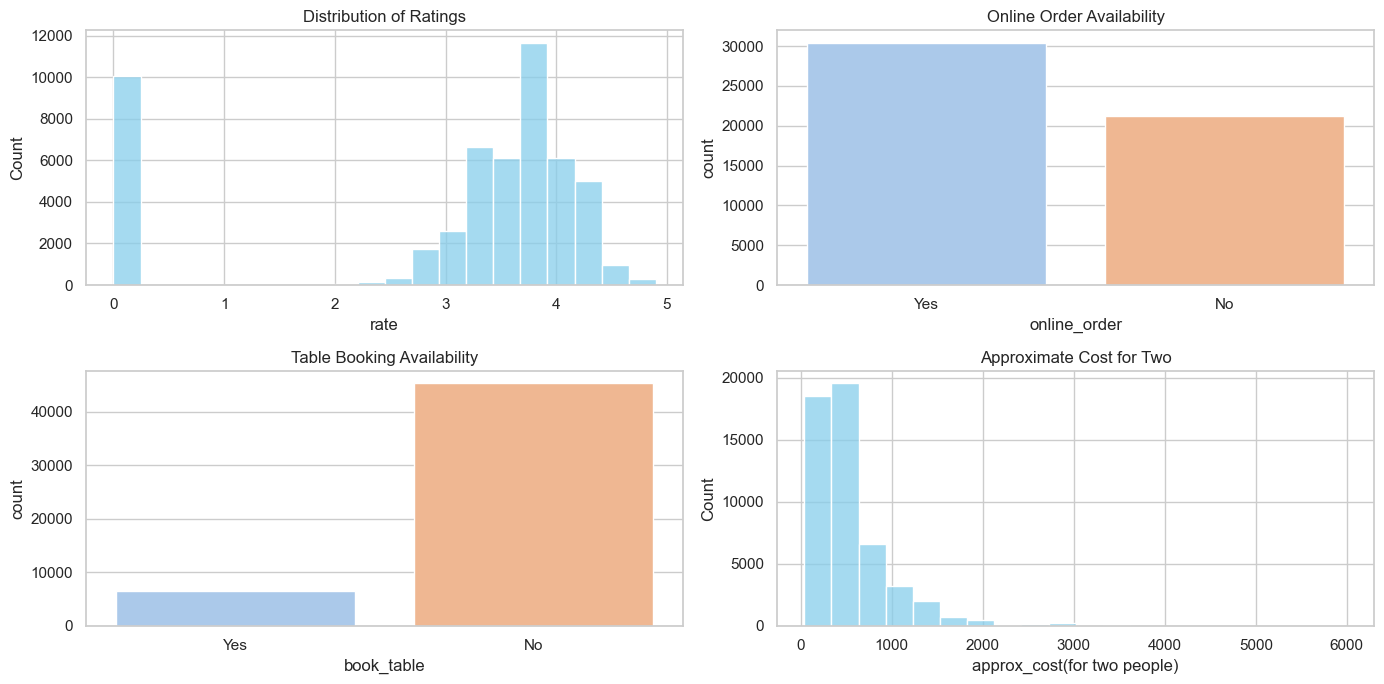

In [16]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Define the figure size
plt.figure(figsize=(14, 7))

# Distribution of Ratings
plt.subplot(221)
sns.histplot(df_cleaned['rate'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Ratings')

# Online Order Availability
plt.subplot(222)
sns.countplot(x='online_order', data=df_cleaned, palette='pastel')
plt.title('Online Order Availability')

# Table Booking Availability
plt.subplot(223)
sns.countplot(x='book_table', data=df_cleaned, palette='pastel')
plt.title('Table Booking Availability')

# Approximate Cost for Two
plt.subplot(224)
sns.histplot(df_cleaned['approx_cost(for two people)'], bins=20, kde=False, color='skyblue')
plt.title('Approximate Cost for Two')

# Adjust the layout
plt.tight_layout()

plt.show()

In [17]:
from collections import Counter

# Helper function to get the most common terms in a column
def get_most_common_terms(series, top_n=10):
    # Split the series into a list of terms
    terms_list = series.dropna().str.split(', ').sum()
    
    # Count the terms and get the most common ones
    most_common_terms = Counter(terms_list).most_common(top_n)
    
    return most_common_terms

# Get the top 10 cuisines, restaurant types, and locations
top_cuisines = get_most_common_terms(df_cleaned['cuisines'])
top_rest_types = get_most_common_terms(df_cleaned['rest_type'])
top_locations = get_most_common_terms(df_cleaned['location'])

top_cuisines, top_rest_types, top_locations

([('North Indian', 21085),
  ('Chinese', 15547),
  ('South Indian', 8644),
  ('Fast Food', 8096),
  ('Biryani', 6492),
  ('Continental', 5765),
  ('Desserts', 5633),
  ('Cafe', 5303),
  ('Beverages', 4747),
  ('Italian', 3389)],
 [('Quick Bites', 20639),
  ('Casual Dining', 13057),
  ('Cafe', 5074),
  ('Delivery', 4641),
  ('Dessert Parlor', 3211),
  ('Bar', 2457),
  ('Takeaway', 2157),
  ('Bakery', 1998),
  ('Beverage Shop', 1471),
  ('Pub', 950)],
 [('BTM', 5124),
  ('HSR', 2523),
  ('Koramangala 5th Block', 2504),
  ('Whitefield', 2374),
  ('JP Nagar', 2235),
  ('Indiranagar', 2083),
  ('Jayanagar', 1926),
  ('Marathahalli', 1846),
  ('Bannerghatta Road', 1630),
  ('Bellandur', 1286)])

C:\Users\delll\AppData\Local\Temp\ipykernel_8628\4241795177.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df_cleaned, palette='pastel')
C:\Users\delll\AppData\Local\Temp\ipykernel_8628\4241795177.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='rate', data=df_cleaned, palette='pastel')


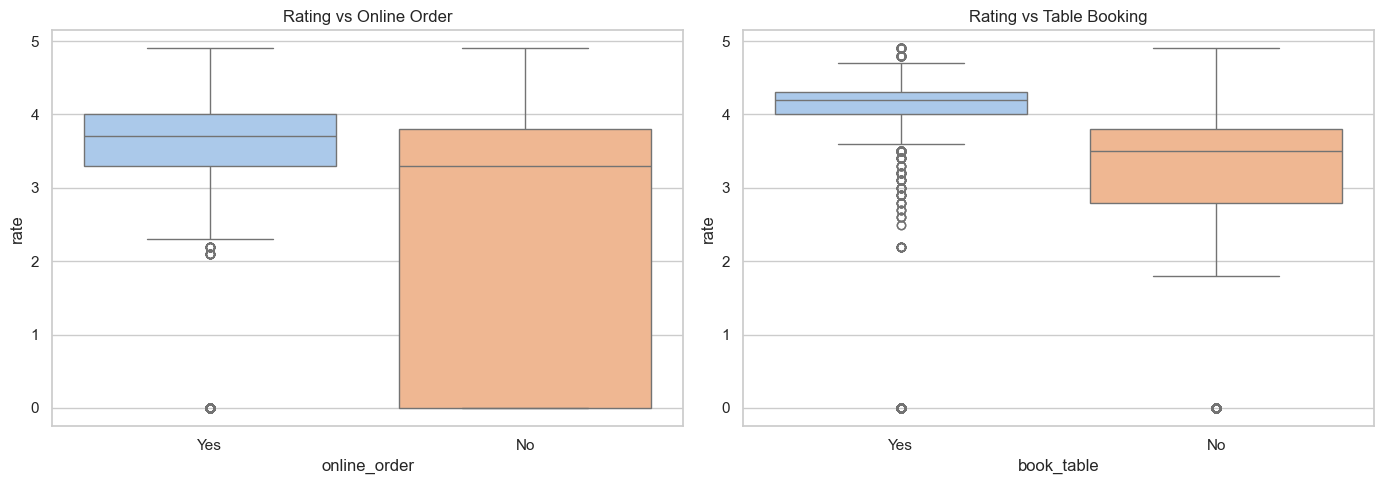

In [18]:
# Define the figure size
plt.figure(figsize=(14, 5))

# Rating vs Online Order
plt.subplot(121)
sns.boxplot(x='online_order', y='rate', data=df_cleaned, palette='pastel')
plt.title('Rating vs Online Order')

# Rating vs Table Booking
plt.subplot(122)
sns.boxplot(x='book_table', y='rate', data=df_cleaned, palette='pastel')
plt.title('Rating vs Table Booking')

# Adjust the layout
plt.tight_layout()

plt.show()

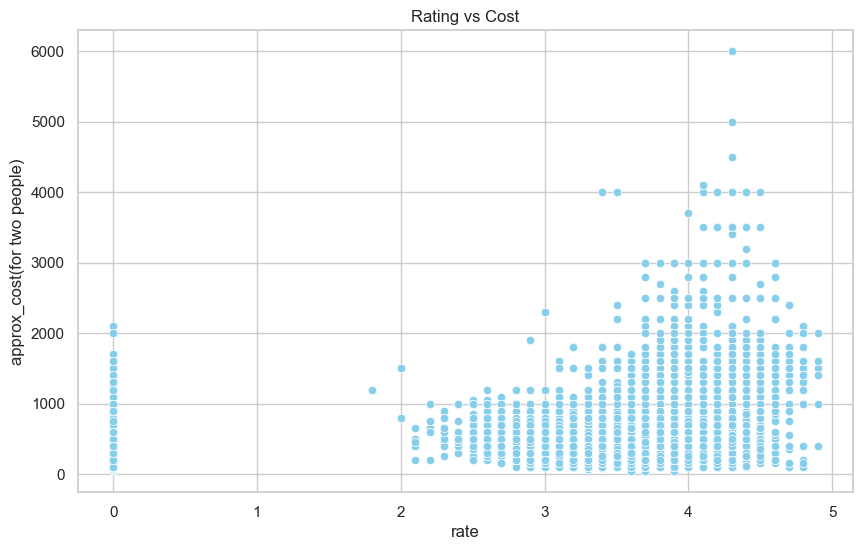

In [19]:
# Rating vs Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df_cleaned, color='skyblue')
plt.title('Rating vs Cost')
plt.show()

In [20]:
# Calculate the average cost and average rating for each location
location_analysis = df_cleaned.groupby('location').agg({'approx_cost(for two people)': 'mean', 'rate': 'mean'}).reset_index()

# Rename the columns
location_analysis.columns = ['location', 'average_cost', 'average_rating']

# Display the first few rows of the result
location_analysis.head()

,location,average_cost,average_rating
0,BTM,396.498829,2.740984
1,Banashankari,421.225166,2.997241
2,Banaswadi,397.063253,2.527259
3,Bannerghatta Road,443.331288,2.657485
4,Basavanagudi,360.979532,3.193421


C:\Users\delll\AppData\Local\Temp\ipykernel_8628\343156558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_cost', y='location', data=top_cost_locations, palette='pastel')


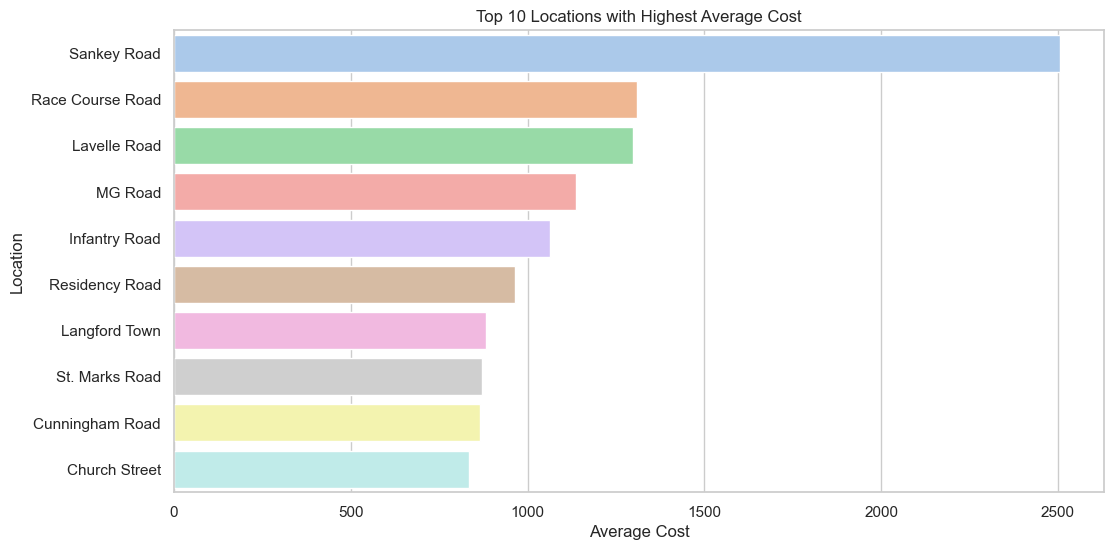

In [21]:
# Get the top 10 locations with the highest average cost
top_cost_locations = location_analysis.sort_values('average_cost', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='average_cost', y='location', data=top_cost_locations, palette='pastel')
plt.title('Top 10 Locations with Highest Average Cost')
plt.xlabel('Average Cost')
plt.ylabel('Location')
plt.show()

C:\Users\delll\AppData\Local\Temp\ipykernel_8628\3223172038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='location', data=top_rating_locations, palette='pastel')


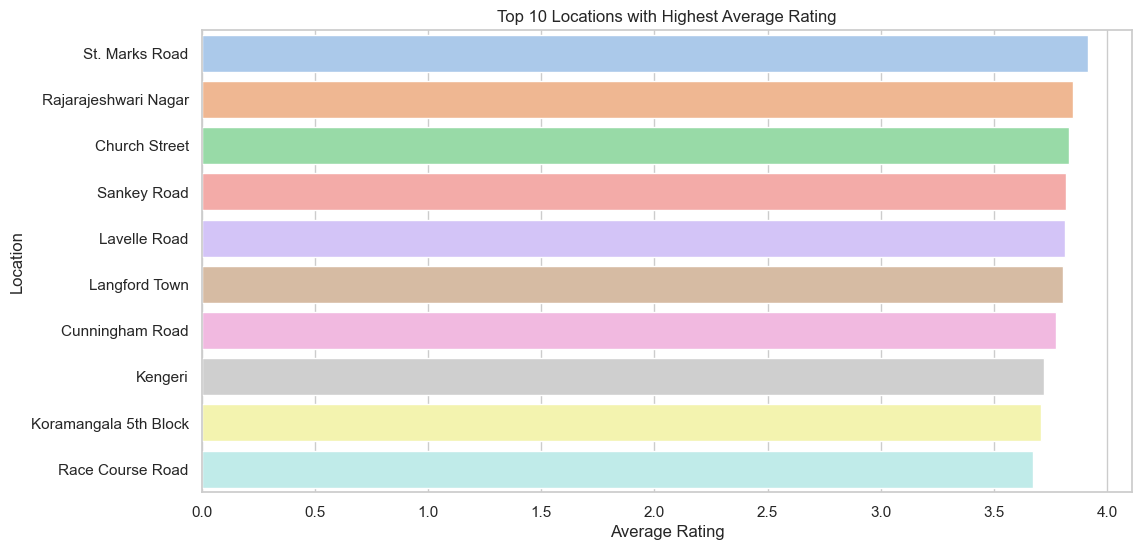

In [22]:
# Get the top 10 locations with the highest average rating
top_rating_locations = location_analysis.sort_values('average_rating', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='location', data=top_rating_locations, palette='pastel')
plt.title('Top 10 Locations with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()